<a href="https://colab.research.google.com/github/baddfish/Building-Energy-Efficiency-Prediction-Project/blob/master/Project_Energy_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Source Link**

http://archive.ics.uci.edu/ml/datasets/Energy+efficiency

Book link:
https://books.google.com/books?id=nJWmDQAAQBAJ&pg=PA57&lpg=PA57&dq=X7+Glazing+Area&source=bl&ots=9vcd9lMBKx&sig=ACfU3U104uk2t3Sox85bkYxjIN4uJvP2-A&hl=en&sa=X&ved=2ahUKEwiT9KD60IPoAhWxdN8KHUYGAsAQ6AEwAHoECAgQAQ#v=onepage&q=X7%20Glazing%20Area&f=false

**Source:**

*The dataset was created by Angeliki Xifara (angxifara '@' gmail.com, Civil/Structural Engineer) and was processed by Athanasios Tsanas (tsanasthanasis '@' gmail.com, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).*

**Data Set Information:**

*We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.*

**Attribute Information:**

*The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.*

Specifically:

**X Attributes, variables, features:**

*   X1 Relative Compactness
*   X2 Surface Area
*   X3 Wall Area
*   X4 Roof Area
*   X5 Overall Height
*   X6 Orientation
*   X7 Glazing Area
*   X8 Glazing Area Distribution

**y target, predict:**

*   y1 Heating Load
*   y2 Cooling Load


# ***Import Data***

# **CHECKLIST**

$\checkmark$ choose target (**Y1**)

$\checkmark$ Evaluation metric (**MSE, RMSE, MAE, or R2**)

$\checkmark$ (***mean***, median, linear regression)

$\checkmark$ Choose (***regression***, binary classification, or multi-class classification)

$\checkmark$ Fit and evaluate any linear model for (***regression*** or classification)

$\checkmark$  Student fits and evaluates a (decision tree, ***random forrest***, or **gradient boosting model**) for regression or classification

$\checkmark$  Student writes 300+ words (not including code). Student reports **baseline score**,** validation scores** from 2+ models, and test score from 1 selected model

$\checkmark$ Student makes 3+ visualizations to explore their data and explain their models

$\checkmark$  Student commits all code to GitHub. Notebooks have no error messages

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://github.com/baddfish/Building-Energy-Efficiency-Prediction-Project/blob/master/Energy_Efficiency.xlsx?raw=true'
    !pip install category_encoders==2.*

In [321]:
%matplotlib inline
import pandas as pd
pd.options.display.max_columns = None
df = pd.read_excel(DATA_PATH+'Energy_Efficiency.xlsx')
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


# ***Define ML problem***

## 1.   Choose a target to predict, and check its distribution

*   Choose y target value
*   Check distribtion for y [link text](https://)
*   Regression: Is the target right-skewed? If so, you may want to log transform the target
*   https://stats.stackexchange.com/questions/107610/what-is-the-reason-the-log-transformation-is-used-with-right-skewed-distribution



## 2.   Avoid leakage of information from test to train or from target to features
**Choose an appropriate evaluation metric**

*   Mean Baseline


In [0]:
import numpy as np
import scipy as sp
import pandas as pd
import pandas_profiling
import matplotlib as mpl
import seaborn as sns
from google.colab import drive
import pandas_profiling as pf
from pandas_profiling import ProfileReport

In [323]:
pandas_profiling.ProfileReport(df)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



Number of variables,10
Number of observations,768
Total Missing (%),0.0%
Total size in memory,60.1 KiB
Average record size in memory,80.2 B
Numeric,8
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,1


In [324]:
df.describe()


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [325]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [326]:
df['Y1'].describe()

count    768.000000
mean      22.307195
std       10.090204
min        6.010000
25%       12.992500
50%       18.950000
75%       31.667500
max       43.100000
Name: Y1, dtype: float64

In [327]:
df.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [0]:
# We need to choose a target to predict
# Let's take a stab at ____________

y = df['Y1']

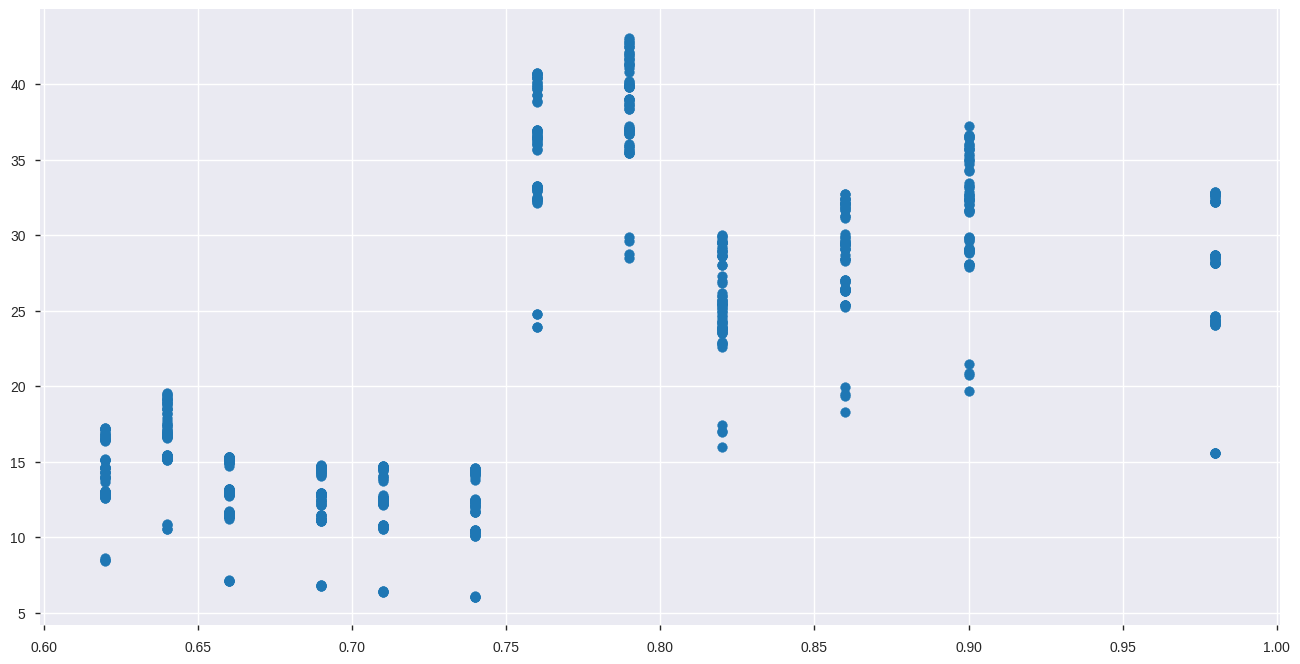

In [329]:
## SCATTER PLOT
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['X1'], df['Y1'])
ax.set_xlabel('')
ax.set_ylabel('')
plt.show()

In [0]:
# import category_encoders as ce
import numpy as np
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [331]:
####  SET TARGET
####  SET FEATURES
#### TRAIN /TEST SPLIT

features = df['X1'], df['X2'], df['X3'], df['X4'], df['X5'], df['X6'], df['X7'], df['X8']
target  = df['Y1']

train, test = train_test_split(df, test_size=0.2)

train.shape, test.shape

((614, 10), (154, 10))

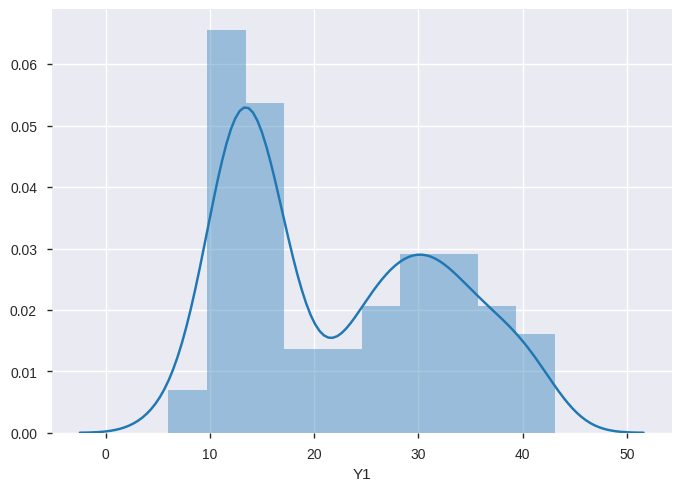

In [332]:
# Because this is a regression problem, we're going to look 
# at the ditribution by doing a quick Seaborn plot

import seaborn as sns

sns.distplot(target);

In [333]:
## So we can see that we have a clear right-skew 
# Let's check describe again

target.describe()

count    768.000000
mean      22.307195
std       10.090204
min        6.010000
25%       12.992500
50%       18.950000
75%       31.667500
max       43.100000
Name: Y1, dtype: float64

In [0]:
## Because we have an obvious right skew,
## lets take a look at log transform the target

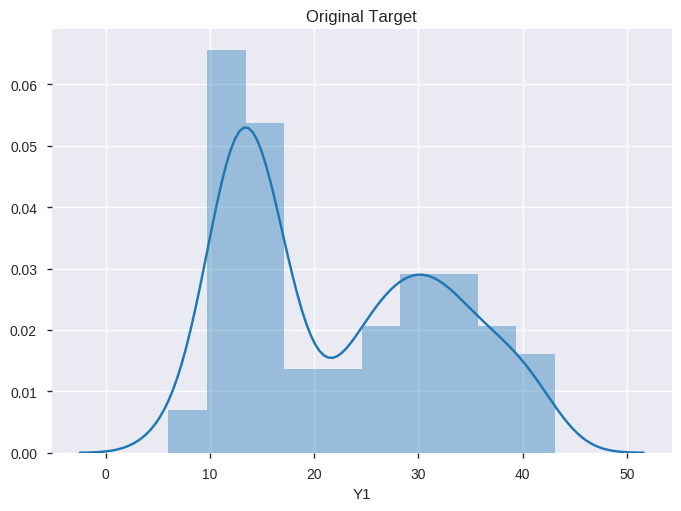

In [335]:
sns.distplot(target)
plt.title('Original Target');

Text(0.5, 1.0, 'Log-transormed-Target')

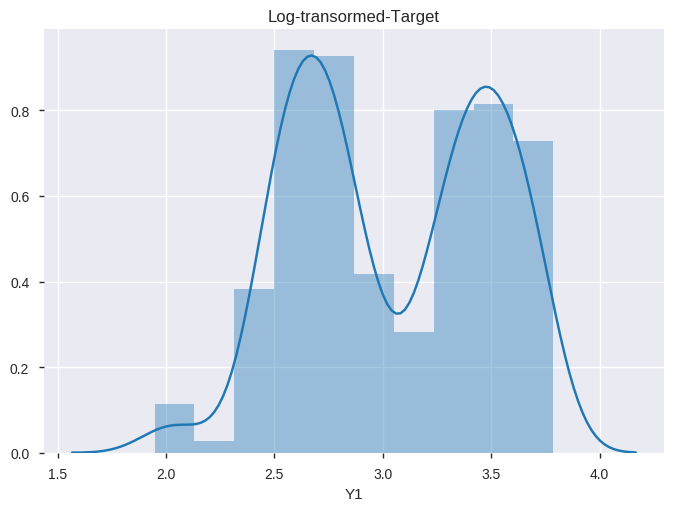

In [336]:
y_log = np.log1p(target)
sns.distplot(y_log)
plt.title('Log-transormed-Target')

In [337]:
# Let's take a quick look at the relationship between X1 and Y1

import plotly.express as px
px.scatter(df, x='X1', y='Y1', trendline='ols')

In [0]:
## Arrange y target vectors
target = 'Y1'
y_train = train[target]
y_test = test[target]

In [339]:
## Baseline
print('Mean Baseline (Using 0 features)')
guess = y_train.mean()
print(guess)

Mean Baseline (Using 0 features)
22.536377850162847


In [340]:
# 3. Arrange X features matrices (already did y target vectors)
features = ['X1']
X_train = train[features]
X_test = test[features]
print(f'Linear Regression, dependent on: {features}')

Linear Regression, dependent on: ['X1']


In [341]:
# Train  Error 
from sklearn.metrics import mean_absolute_error
y_pred = [guess] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Train Error (Target): {mae:.2f} points')

Train Error (Target): 9.14 percentage points


In [342]:
# Test Error 
y_pred = [guess] * len(y_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test Error (Test): {mae:.2f} points')

Test Error (Test): 9.20 percentage points


In [343]:
# Scatter plot
px.scatter(
    train,
    x='X1',
    y='Y1',
    text='Y1',
    title='Relationship between our feature and target',
    trendline='ols',  # Ordinary Least Squares
)

In [0]:
# 1 Import the appropriate estimator class from Scikit-Learn
from sklearn.linear_model import LinearRegression

In [0]:
# 2 Instantiate this class
model = LinearRegression()

In [346]:
# 3. Arrange X features matrices (already did y target vectors)
features = ['X1']
X_train = train[features]
X_test = test[features]
print(f'Linear Regression, dependent on: {features}')

Linear Regression, dependent on: ['X1']


In [0]:
# 4. Fit the model
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Train Error: {mae:.2f} points')

In [348]:
# 5. Apply the model to new data
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test Error: {mae:.2f} points')

Test Error: 5.97 percentage points


### Multiple regression (2 features)

In [349]:
px.scatter_3d(
    train,
    x='X1', 
    y='X2', 
    z='Y1', 
    text='Y1', 
    title='2 Features (X1, and X2) and target (Y1)'
)

# ***Fit Random Forrest Regressor model***

In [350]:
dataset = df
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [0]:
X = df['X1'].values  
y = df['Y1'].values 

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
# Feature Scaling
# from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [0]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

**X Attributes, variables, features Descriptions:**

*   X1 Relative Compactness:
*   X2 Surface Area
*   X3 Wall Area
*   X4 Roof Area
*   X5 Overall Height
*   X6 Orientation
*   X7 Glazing Area
*   X8 Glazing Area Distribution

**y target, predict Descriptions:**

*   y1 Heating Load
*   y2 Cooling Load
